In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [2]:
df=pd.read_csv("Automobile_data.csv")

In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [4]:
normal=df["normalized-losses"].replace("?","nan",inplace=True)

In [5]:
normal

In [6]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,nan,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,nan,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,nan,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
width                205 non-null float64
height               205 non-null float64
engine-type          205 non-null object
engine-size          205 non-null int64
horsepower           205 non-null object
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                205 non-null int64
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


In [8]:
df.describe()

,symboling,width,height,engine-size,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,65.907805,53.724878,126.907317,25.219512,30.751220,13227.478049
std,1.245307,2.145204,2.443522,41.642693,6.542142,6.886443,7902.651615
min,-2.000000,60.300000,47.800000,61.000000,13.000000,16.000000,5118.000000
25%,0.000000,64.100000,52.000000,97.000000,19.000000,25.000000,7788.000000
50%,1.000000,65.500000,54.100000,120.000000,24.000000,30.000000,10345.000000
75%,2.000000,66.900000,55.500000,141.000000,30.000000,34.000000,16500.000000
max,3.000000,72.300000,59.800000,326.000000,49.000000,54.000000,45400.000000


In [9]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [10]:
df['normalized-losses']=df["normalized-losses"].astype(float)

In [11]:
df['normalized-losses'].mean()

122.0

In [12]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,NaN,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,NaN,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [13]:
df.fillna(122,inplace=True)

In [14]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [15]:
for col in df:
    col,'-',df[col].unique()
    print(col,'-',df[col].unique())

symboling - [ 3  1  2  0 -1 -2]
normalized-losses - [122. 164. 158. 192. 188. 121.  98.  81. 118. 148. 110. 145. 137. 101.
  78. 106.  85. 107. 104. 113. 150. 129. 115.  93. 142. 161. 153. 125.
 128. 103. 168. 108. 194. 231. 119. 154.  74. 186.  83. 102.  89.  87.
  77.  91. 134.  65. 197.  90.  94. 256.  95.]
make - ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
fuel-type - ['gas' 'diesel']
body-style - ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive-wheels - ['rwd' 'fwd' '4wd']
engine-location - ['front' 'rear']
width - [64.1 65.5 66.2 66.4 66.3 71.4 67.9 64.8 66.9 70.9 60.3 63.6 63.8 64.6
 63.9 64.  65.2 62.5 66.  61.8 69.6 70.6 64.2 65.7 66.5 66.1 70.3 71.7
 70.5 72.  68.  64.4 65.4 68.4 68.3 65.  72.3 66.6 63.4 65.6 67.7 67.2
 68.9 68.8]
height - [48.8 52.4 54.3 53.1 55.7 55.9 52.  53.7 56.3 53.2 50.

In [16]:
df["horsepower"].replace("?","nan",inplace=True)

In [17]:
for col in df:
    col,'-',df[col].unique()
    print(col,'-',df[col].unique())

symboling - [ 3  1  2  0 -1 -2]
normalized-losses - [122. 164. 158. 192. 188. 121.  98.  81. 118. 148. 110. 145. 137. 101.
  78. 106.  85. 107. 104. 113. 150. 129. 115.  93. 142. 161. 153. 125.
 128. 103. 168. 108. 194. 231. 119. 154.  74. 186.  83. 102.  89.  87.
  77.  91. 134.  65. 197.  90.  94. 256.  95.]
make - ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
fuel-type - ['gas' 'diesel']
body-style - ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive-wheels - ['rwd' 'fwd' '4wd']
engine-location - ['front' 'rear']
width - [64.1 65.5 66.2 66.4 66.3 71.4 67.9 64.8 66.9 70.9 60.3 63.6 63.8 64.6
 63.9 64.  65.2 62.5 66.  61.8 69.6 70.6 64.2 65.7 66.5 66.1 70.3 71.7
 70.5 72.  68.  64.4 65.4 68.4 68.3 65.  72.3 66.6 63.4 65.6 67.7 67.2
 68.9 68.8]
height - [48.8 52.4 54.3 53.1 55.7 55.9 52.  53.7 56.3 53.2 50.

In [18]:
df["horsepower"]=df["horsepower"].astype(float)

In [19]:
horse_mean=df["horsepower"].mean()
horse_mean

104.25615763546799

In [20]:
df.fillna(104,inplace=True)

In [21]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,13495
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,16500
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26,16500
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30,13950
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22,17450


In [22]:
for col in df:
    col,'-',df[col].unique()
    print(col,'-',df[col].unique())

symboling - [ 3  1  2  0 -1 -2]
normalized-losses - [122. 164. 158. 192. 188. 121.  98.  81. 118. 148. 110. 145. 137. 101.
  78. 106.  85. 107. 104. 113. 150. 129. 115.  93. 142. 161. 153. 125.
 128. 103. 168. 108. 194. 231. 119. 154.  74. 186.  83. 102.  89.  87.
  77.  91. 134.  65. 197.  90.  94. 256.  95.]
make - ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
fuel-type - ['gas' 'diesel']
body-style - ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive-wheels - ['rwd' 'fwd' '4wd']
engine-location - ['front' 'rear']
width - [64.1 65.5 66.2 66.4 66.3 71.4 67.9 64.8 66.9 70.9 60.3 63.6 63.8 64.6
 63.9 64.  65.2 62.5 66.  61.8 69.6 70.6 64.2 65.7 66.5 66.1 70.3 71.7
 70.5 72.  68.  64.4 65.4 68.4 68.3 65.  72.3 66.6 63.4 65.6 67.7 67.2
 68.9 68.8]
height - [48.8 52.4 54.3 53.1 55.7 55.9 52.  53.7 56.3 53.2 50.

In [23]:
auto_num=df.select_dtypes(["int64","float"])

In [24]:
auto_num.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,2,164.0,66.4,54.3,136,115.0,18,22,17450


In [25]:
auto_corr=auto_num.corr()

In [26]:
auto_corr["price"]

symboling           -0.085781
normalized-losses    0.133424
width                0.718253
height               0.132444
engine-size          0.852995
horsepower           0.746618
city-mpg            -0.654611
highway-mpg         -0.679048
price                1.000000
Name: price, dtype: float64

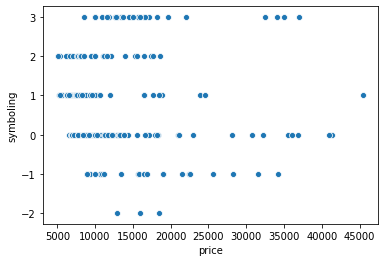

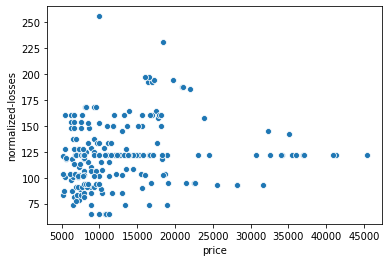

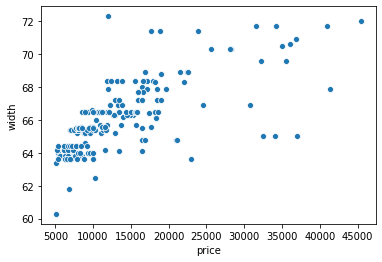

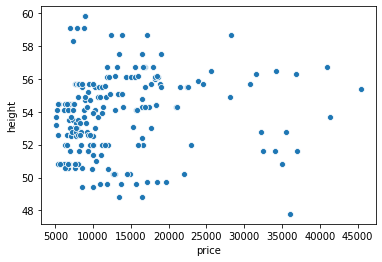

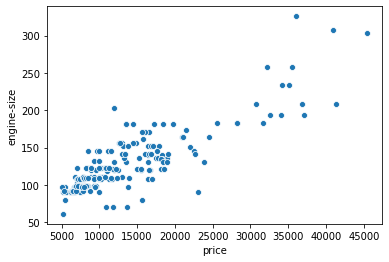

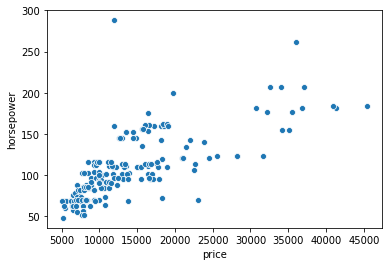

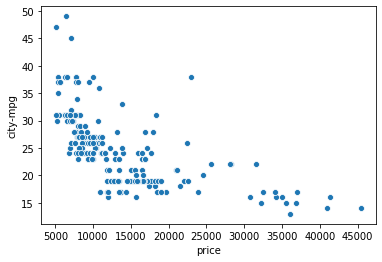

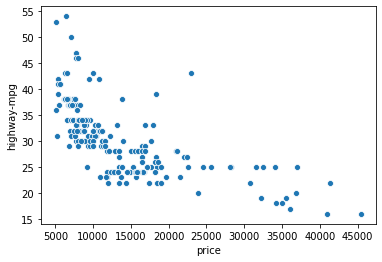

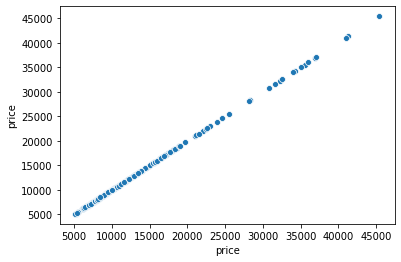

In [27]:
for col in auto_num:
    sns.scatterplot(x=df["price"],y=df[col])
    plt.show()

In [28]:
from scipy.stats import skew


In [29]:
for col in auto_num:
    print (col,skew(df[col]))

symboling 0.20952469094997359
normalized-losses 0.8485348696008058
width 0.8973753485201392
height 0.06265991683394276
engine-size 1.9333748457840114
horsepower 1.3877040597952843
city-mpg 0.6588377533622138
highway-mpg 0.5360379305163596
price 1.791937476907277


symboling 0.20952469094997359


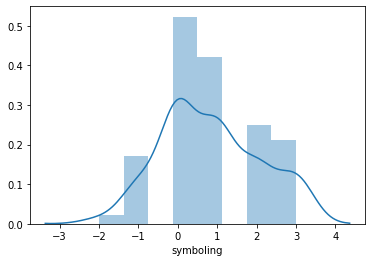

normalized-losses 0.8485348696008058


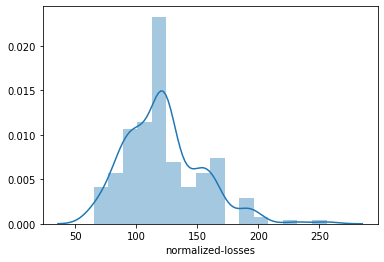

width 0.8973753485201392


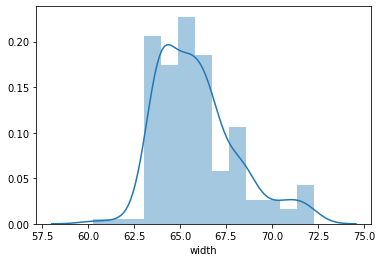

height 0.06265991683394276


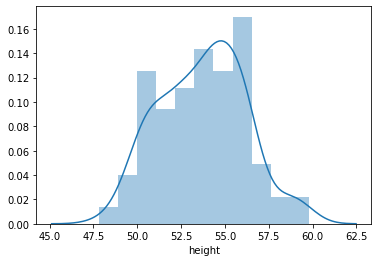

engine-size 1.9333748457840114


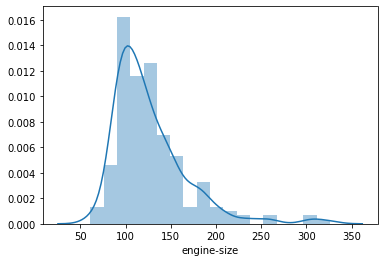

horsepower 1.3877040597952843


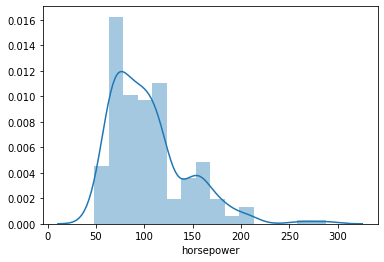

city-mpg 0.6588377533622138


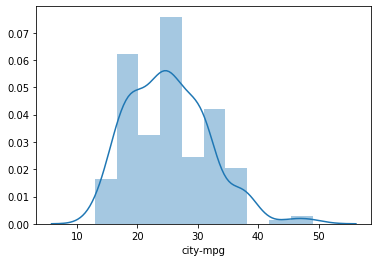

highway-mpg 0.5360379305163596


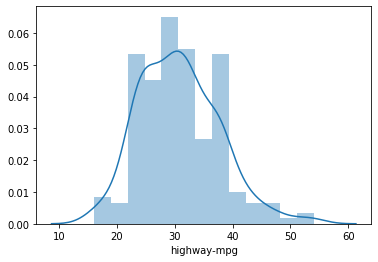

price 1.791937476907277


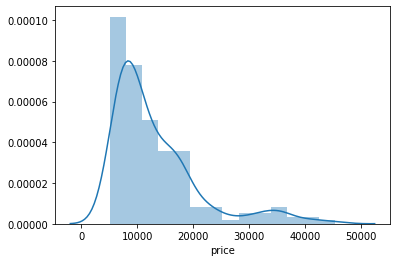

In [30]:
for col in auto_num:
    print (col,skew(df[col]))
    plt.figure()
    sns.distplot(auto_num[col])
    plt.show()

In [31]:
auto_num.corr()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
symboling,1.000000,0.465190,-0.232919,-0.541038,-0.105790,0.071380,-0.035823,0.034606,-0.085781
normalized-losses,0.465190,1.000000,0.084195,-0.370706,0.110997,0.203434,-0.218749,-0.178221,0.133424
width,-0.232919,0.084195,1.000000,0.279210,0.735433,0.642176,-0.642704,-0.677218,0.718253
height,-0.541038,-0.370706,0.279210,1.000000,0.067149,-0.110114,-0.048640,-0.107358,0.132444
engine-size,-0.105790,0.110997,0.735433,0.067149,1.000000,0.810705,-0.653658,-0.677470,0.852995
horsepower,0.071380,0.203434,0.642176,-0.110114,0.810705,1.000000,-0.803140,-0.770905,0.746618
city-mpg,-0.035823,-0.218749,-0.642704,-0.048640,-0.653658,-0.803140,1.000000,0.971337,-0.654611
highway-mpg,0.034606,-0.178221,-0.677218,-0.107358,-0.677470,-0.770905,0.971337,1.000000,-0.679048
price,-0.085781,0.133424,0.718253,0.132444,0.852995,0.746618,-0.654611,-0.679048,1.000000


In [133]:
x=auto_num["city-mpg"]
y=auto_num["highway-mpg"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
lr=LinearRegression()
lr.fit(x_train.as_matrix().reshape((-1,1)),y_train)


C:\Users\IT VEDANT 5\Anaconda3\anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [134]:
coef=lr.coef_

In [135]:
coef

array([1.00838289])

In [136]:
intercept=lr.intercept_

In [137]:
intercept

5.309493028422587

In [138]:
y_pred=lr.predict(x_test.as_matrix().reshape((-1,1)))

C:\Users\IT VEDANT 5\Anaconda3\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [139]:
y_pred

array([36.56936265, 36.56936265, 36.56936265, 43.62804288, 32.53583108,
       27.49391663, 36.56936265, 52.7034889 , 36.56936265, 31.52744819,
       23.46038506, 29.51068241, 29.51068241, 32.53583108, 24.46876796,
       29.51068241, 29.51068241, 35.56097976, 24.46876796, 29.51068241,
       34.55259686, 36.56936265, 28.50229952, 29.51068241, 29.51068241,
       35.56097976, 24.46876796, 42.61965999, 36.56936265, 35.56097976,
       34.55259686, 29.51068241, 21.44361928, 28.50229952, 33.54421397,
       42.61965999, 29.51068241, 20.43523639, 21.44361928, 24.46876796,
       36.56936265, 24.46876796, 50.68672312, 30.5190653 , 32.53583108,
       36.56936265, 19.4268535 , 36.56936265, 23.46038506, 24.46876796,
       27.49391663, 24.46876796, 25.47715085, 33.54421397, 31.52744819,
       43.62804288, 32.53583108, 32.53583108, 30.5190653 , 34.55259686,
       22.45200217, 32.53583108])

In [140]:
mse=mean_squared_error(y_pred,y_test)

In [141]:
mse

2.0499725207825286

In [142]:
mae=mean_absolute_error(y_pred,y_test)

In [143]:
mae

1.058736922114061

In [144]:
r2=r2_score(y_pred,y_test)

In [145]:
r2

0.9555243146299124

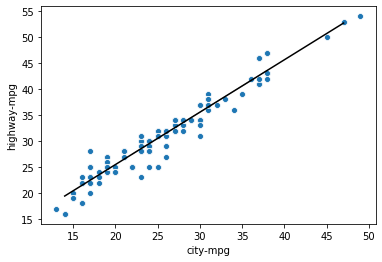

In [146]:
plt.figure()
sns.scatterplot(x,y)
sns.lineplot(x_test,y_pred,color="black")
plt.show()

array([0.00382042])